In [1]:
using Pkg
include("/cluster/home/danare/git/Clustering/TSClustering.jl")
cd("/cluster/home/danare/git/Clustering")
Pkg.activate(".")
using .TSClustering
using Distances
using Clustering
using DelimitedFiles
using DataFrames
using DynamicAxisWarping
using Dates
using Statistics
using CSV
using PlotlyJS


  Activating project at `~/git/Clustering`


In [2]:
# config
path = "/cluster/home/danare/git/GENeSYS_MOD.data/Output/output_excel/Timeseries.xlsx"
config = "/cluster/home/danare/git/Clustering/data/config2.yml"
K = [6]
W = Dict(
    "Euclidean" => 0,
    "DTW (10)"  => 10,
);

# empty DataFrame

# read in data
config = TSClustering.read_yaml_file(file=config);
data_org = TSClustering.read_data(path=path, config=config)

## Correlation between different regions

In [3]:
data_org

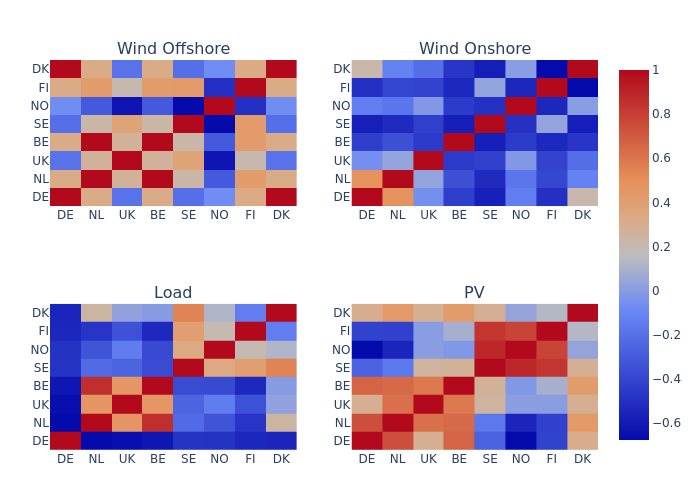

In [3]:
p = make_subplots(rows=2, 
cols=2, 
subplot_titles= ["Wind Offshore" "Wind Onshore" "Load" "PV"]
)

for (df, i, j, k) in zip(keys(data_org), [1,1,2,2], [1,2,1,2], [true,false,false,false])
    z = cor(Matrix(data_org[df]))
    add_trace!(p,
    heatmap(z=z,
    colorscale="PdBu",
    showscale=k,
    y=names(data_org[df]),
    x=names(data_org[df])),
    row=i, col=j)
end


relayout!(p)
#TSClustering.format_layout(p=p, max_value=0)
p

In [4]:
savefig(p, "plot.html")

"plot.html"

## Wind, PV & Load Correlation

In [8]:
p = make_subplots(rows=2, 
cols=2, 
)

for (w, i, j, k) in zip(["TS_WIND_OFFSHORE_DEEP" , "TS_WIND_ONSHORE_AVG", "TS_PV_AVG"], [1,1,2], [1,2,1], [true,false,false])
    z = cor(Matrix(data_org[w]), Matrix(data_org["TS_LOAD"]))

    add_trace!(p,
    heatmap(z=z,
    colorscale="PdBu",
    showscale=k,
    y=names(data_org[w]),
    x=names(data_org[w])),
    row=i, col=j)
end

relayout!(p)
p

# for (i, w) in enumerate(["TS_WIND_OFFSHORE_DEEP" , "TS_WIND_ONSHORE_AVG", "TS_PV_AVG"])
#     z = cor(Matrix(data_org[w]), Matrix(data_org["TS_LOAD"]))
#     showscale = i == 2 ? true : false

#     add_trace!(p,
#     heatmap(z=z,
#     colorscale="PdBu",
#     showscale=showscale,
#     y=names(data_org[w]),
#     x=names(data_org[w]),
#     layout=Layout(
#         xaxis=XAxis(title="LOAD"),
#         yaxis=YAxis(title=w)
#     ),
#     ),
#     row=1, col=i)
# end
# relayout!(p)
# p

In [ ]:
p = make_subplots(rows=1, 
cols=3, 
subplot_titles= ["TS_WIND_OFFSHORE_DEEP" "TS_WIND_OFFSHORE" "TS_WIND_OFFSHORE_SHALLOW"]
)


for (i, w) in enumerate(["TS_WIND_OFFSHORE_DEEP" , "TS_WIND_OFFSHORE", "TS_WIND_OFFSHORE_SHALLOW"])
    z = cor(Matrix(data_org[w]))
    showscale = i == 2 ? true : false

    add_trace!(p,
    heatmap(z=z,
    colorscale="PdBu",
    showscale=showscale,
    y=names(data_org[w]),
    x=names(data_org[w])),
    row=1, col=i)
end
relayout!(p)
p

In [ ]:
data_org

## Correlation clustered technologies 

In [ ]:
technologies = ["TS_LOAD", "TS_PV_AVG", "TS_HEAT_LOW", "TS_WIND_OFFSHORE_SHALLOW", "TS_WIND_OFFSHORE","TS_WIND_OFFSHORE_DEEP" ]

m = zeros(8760, length(technologies))
for (i,t) in enumerate(technologies)
    m[:,i] = data_org[t][:,"DE"]
end

In [ ]:
p = make_subplots(rows=1, 
cols=1, 
)
z = cor(m)

add_trace!(p,
heatmap(z=z,
colorscale="PdBu",
showscale=true,
y=technologies,
x=technologies),
row=1, col=1)


relayout!(p)
p

frage: hat shallow ein saisonales profil??
offshore & deep correlieren mehr mit heat low!!!!!!!!!!